In [1]:
# import data from drive

from google.colab import drive
drive.mount('/content/gdrive')
!unzip -q "/content/gdrive/My Drive/xrayornot_data.zip"

Mounted at /content/gdrive


In [2]:
'''

project : Covid-19-detection-using-Xray
Author : @kanishksh4rma

'''

'\n\nproject : Covid-19-detection-using-Xray\nAuthor : @kanishksh4rma\n\n'

In [3]:
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import os

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.layers import AveragePooling2D, Dropout,Flatten,Dense,Input
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [5]:
dataset = "/content/xrayornot_data"   # path to the dataset
args={}
args["dataset"]=dataset

In [6]:
import numpy as np
import cv2
img_paths = list(paths.list_images(args["dataset"]))  #image paths
data = []
labels = []
for path in img_paths:
    label = path.split(os.path.sep)[-2]   #split the image paths
    image = cv2.imread(path)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Convert images into RGB Channel
                                                   # Though it isnt necessary for X-ray images
    
    image = cv2.resize(image, (224, 224))  #Resizing the images
    data.append(image)
    labels.append(label)
data = np.array(data) / 255.0
labels = np.array(labels)

In [7]:
Data_Dir = "/content/xrayornot_data"

In [8]:
Cimages = os.listdir("/content/xrayornot_data/xray")
Nimages = os.listdir("/content/xrayornot_data/not-xray")

Not Chest X-ray Vs Chest X-ray


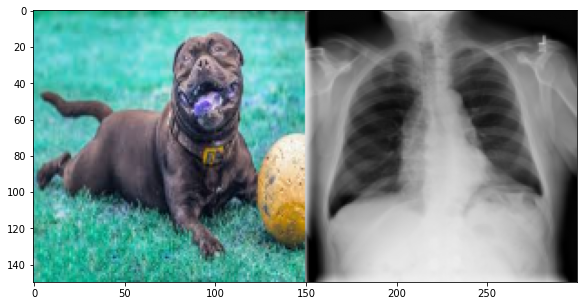

Not Chest X-ray Vs Chest X-ray


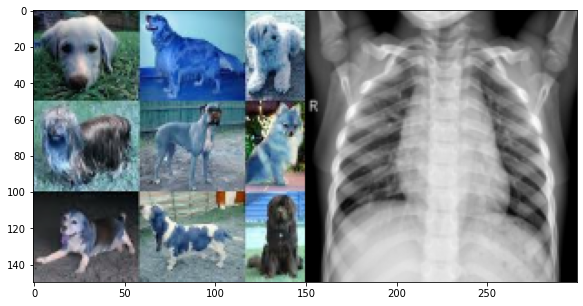

Not Chest X-ray Vs Chest X-ray


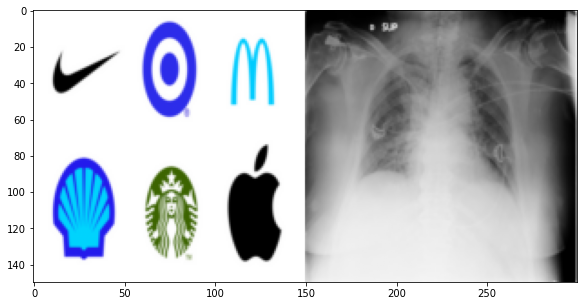

Not Chest X-ray Vs Chest X-ray


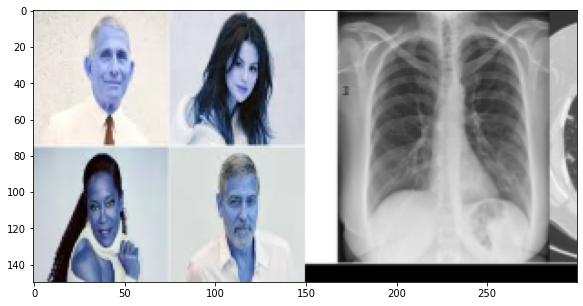

Not Chest X-ray Vs Chest X-ray


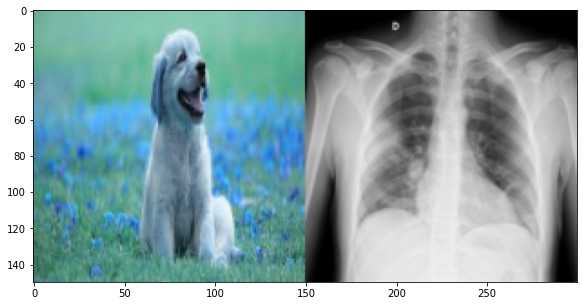

In [9]:
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.transform import resize
import numpy as np

# plot some of the X-rays
def plotter(i):
    normal = cv2.imread("/content/xrayornot_data/not-xray/"+Nimages[i])
    normal = skimage.transform.resize(normal, (150, 150, 3))
    coronavirus = cv2.imread("/content/xrayornot_data/xray/"+Cimages[i])
    coronavirus = skimage.transform.resize(coronavirus, (150, 150, 3) , mode = 'reflect')
    pair = np.concatenate((normal, coronavirus), axis=1)
    print("Not Chest X-ray Vs Chest X-ray")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)


In [10]:
LB = LabelBinarizer()  
#Initialize label binarizer
labels = LB.fit_transform(labels)
labels = to_categorical(labels)

In [11]:
# test train split
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels,
    test_size=0.20, stratify=labels, random_state=42)

In [12]:
#rotate images to create more data
trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest")

In [13]:
bModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))  #base_Model
hModel = bModel.output #head_Model
hModel = AveragePooling2D(pool_size=(4, 4))(hModel)
hModel = Flatten(name="flatten")(hModel)
hModel = Dense(64, activation="relu")(hModel)
hModel = Dropout(0.5)(hModel)
hModel = Dense(2, activation="softmax")(hModel)
model = Model(inputs=bModel.input, outputs=hModel)

for layer in bModel.layers:
    layer.trainable = False

58892288/58889256 [==============================] - 0s 0us/step


In [14]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((37, 224, 224, 3), (10, 224, 224, 3), (37, 2), (10, 2))

In [15]:
INIT_LR = 1e-3
EPOCHS = 20
BS = 8

In [16]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

R = model.fit_generator(
    trainAug.flow(X_train, Y_train, batch_size=BS),
    steps_per_epoch=len(X_train) // BS,
    validation_data=(X_test, Y_test),
    validation_steps=len(X_test) // BS,
    epochs=EPOCHS)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
4/4 [==============================] - 1s 283ms/step - loss: 0.6911 - accuracy: 0.6562 - val_loss: 0.5360 - val_accuracy: 0.9000
Epoch 2/20
4/4 [==============================] - 1s 180ms/step - loss: 0.5046 - accuracy: 0.7241 - val_loss: 0.4856 - val_accuracy: 0.7000
Epoch 3/20
4/4 [==============================] - 0s 79ms/step - loss: 0.4630 - accuracy: 0.8276 - val_loss: 0.4495 - val_accuracy: 0.7000
Epoch 4/20
4/4 [==============================] - 0s 89ms/step - loss: 0.2986 - accuracy: 0.9062 - val_loss: 0.4187 - val_accuracy: 0.8000
Epoch 5/20
4/4 [==============================] - 0s 80ms/step - loss: 0.3059 - accuracy: 0.8621 - val_loss: 0.3867 - val_accuracy: 0.9000
Epoch 6/20
4/4 [==============================] - 0s 81ms/step - loss: 0.2059 - accuracy: 1.0000 - val_loss: 0.3611 - val_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 0s 80ms/step - loss: 0.1975 - accuracy

IndexError: ignored

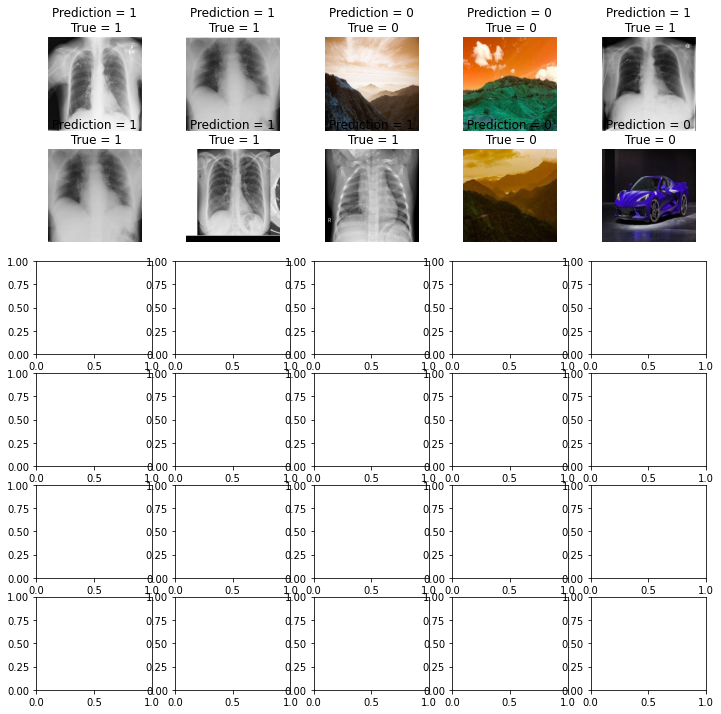

In [17]:

# Let's test on some random test data

L = 6
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=BS)
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_pred.argmax(axis=1)[i], Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 0.5, hspace=0.5)  
print('0 : Affected by COVID19\n1 : Healthy Person') 

Wow! All every prediction are correct.

In [18]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size=BS)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(Y_test.argmax(axis=1), y_pred,target_names=LB.classes_))

              precision    recall  f1-score   support

    not-xray       1.00      1.00      1.00         4
        xray       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [19]:
from sklearn.metrics import accuracy_score
print('Accuracy score : ',accuracy_score(Y_test.argmax(axis=1),y_pred)*100,'%')

Accuracy score :  100.0 %


In [20]:
from sklearn.metrics import confusion_matrix

# check for Sensitivity & Specificity

cm = confusion_matrix(Y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[4 0]
 [0 6]]
acc: 1.0000
sensitivity: 1.0000
specificity: 1.0000


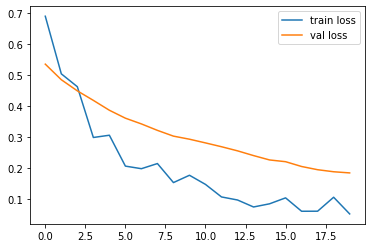

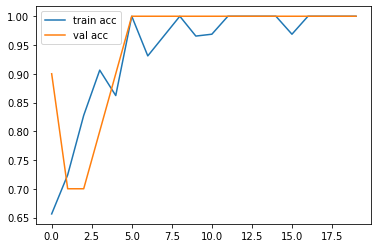

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('LossVal_acc')

In [22]:
model.save('xrayornot_model2.h5')

In [2]:
from flask import jsonify
from keras.preprocessing import image
from keras.models import load_model
from google.colab import files
def upload_file():
  print('making model ')
  image1 = files.upload()
  image_list = list(image1.keys())
  image1 = image_list[0]
  print('Image : ',image1)
  print('=========================')
  print('File uploaded successfully!!!')
  print('=========================')
  return image1

In [9]:
import numpy as np
from flask import jsonify
from keras.preprocessing import image
from keras.models import load_model
image1 = upload_file()
#image1="/content/NORMAL (284).png"
print('fetching results...xrayornot_modelxrayornot_model')
new_model = load_model("/content/xrayornot_data/xrayornot_model2.h5")
test_image = image.load_img(image1,target_size=(224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = new_model.predict(test_image)
y_pred = np.argmax(result, axis=1)
print('Model prediction: ',result)

# make it main if iff want to upload xrays only
if result[0][0]<result[0][1]:
  prediction = 'xray'
  #return 1
else:
  prediction = 'Not xray'
  #return 0


print('YPred',y_pred)
print('===================================')
print(prediction)
print('===================================')


making model 


Saving index.jpeg to index.jpeg
Image :  index.jpeg
File uploaded successfully!!!
fetching results...xrayornot_modelxrayornot_model
Model prediction:  [[1.0514318e-13 1.0000000e+00]]
YPred [1]
xray


In [32]:
pip freeze > requirements.txt